In [12]:
import pytesseract
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import numpy as np
import torch, requests, os, glob
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import cv2


device = "cuda" if torch.cuda.is_available() else "cpu"
print("Running on:", device)

Running on: cuda


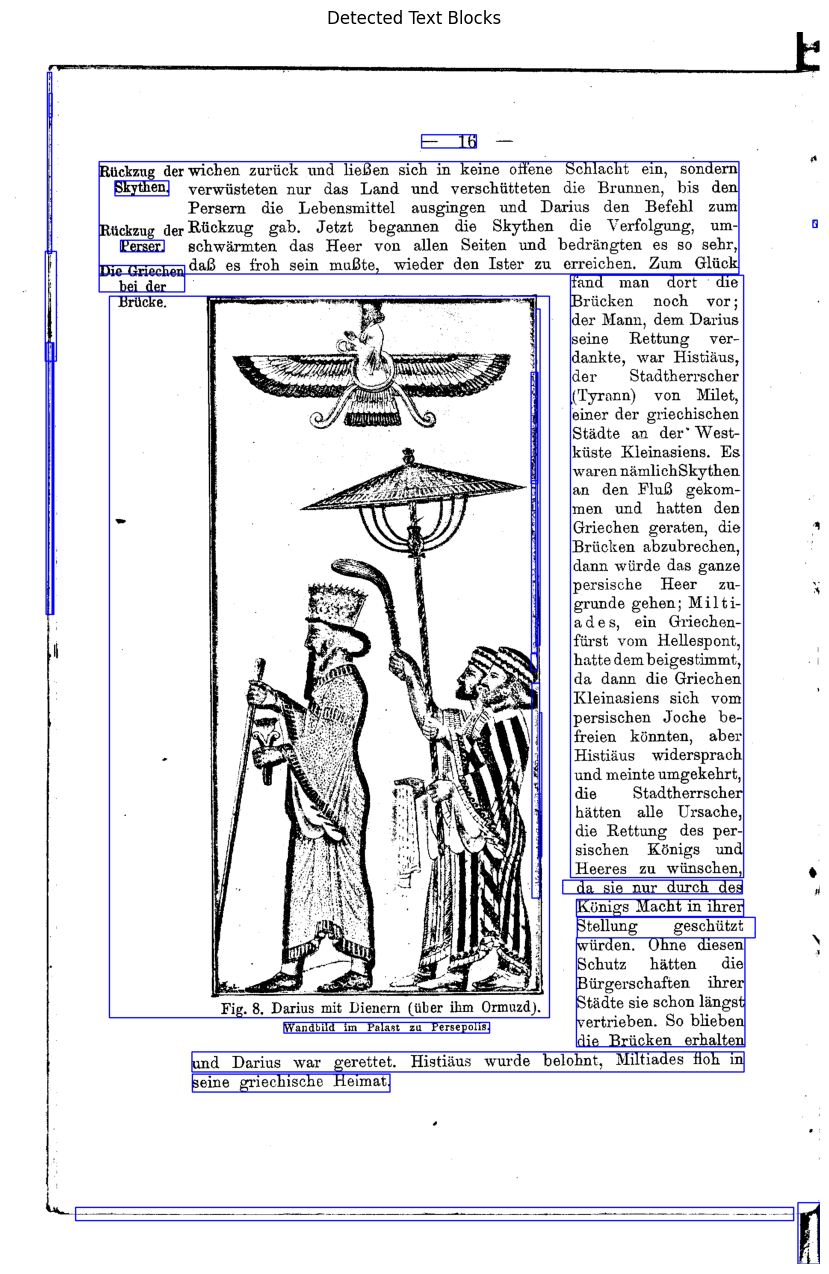

In [18]:
# Tesseract
image_path_blocks = "images/raw/1724666584_00000024.bin.png"
image_blocks = Image.open(image_path_blocks)
cv_image_blocks = cv2.cvtColor(np.array(image_blocks), cv2.COLOR_RGB2BGR)

block_data_new = pytesseract.image_to_data(cv_image_blocks, output_type=pytesseract.Output.DATAFRAME)

# Filter to only keep block-level entries
block_data_new = block_data_new[block_data_new['level'] == 2]
block_data_new = block_data_new.dropna(subset=['left', 'top', 'width', 'height'], how='any')

# Draw rectangles for each text block
image_with_blocks = cv_image_blocks.copy()
for _, row in block_data_new.iterrows():
    x, y, w, h = int(row['left']), int(row['top']), int(row['width']), int(row['height'])
    cv2.rectangle(image_with_blocks, (x, y), (x + w, y + h), (255, 0, 0), 2)

image_with_blocks_rgb = cv2.cvtColor(image_with_blocks, cv2.COLOR_BGR2RGB)
cv2.imwrite("images/different_stategies/pytesseract_level_2.png", image_with_blocks)
# Plot the result
plt.figure(figsize=(12, 16))
plt.imshow(image_with_blocks_rgb)
plt.axis('off')
plt.title("Detected Text Blocks")
plt.show()
